
K-Means Customer Segmentation Analysis


In [105]:
#1 Importing the librariesimport numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. อ่านไฟล์

In [106]:
cust = pd.read_csv('Mall_Customers.csv')

2. แสดงผล 10 บรรทัดแรก

In [107]:
cust.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3. หาค่าสถิติพื้นฐาน

In [108]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [109]:
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

4. ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ

Text(0.5, 1.0, 'Distribution of Gender')

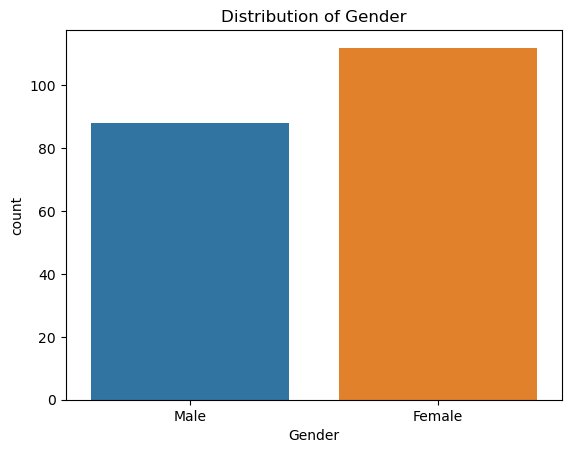

In [110]:
# ตัวอย่างของการใช้ seaborn
sns.countplot(x='Gender', hue="Gender", data=cust)
plt.title('Distribution of Gender')

<Axes: xlabel='Gender'>

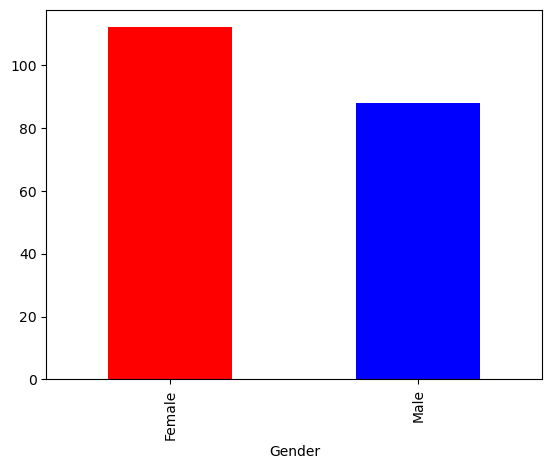

In [111]:
#แบบที่ 1 ตัวอย่างของการใช้ plot ใน pandas 
cust['Gender'].value_counts().plot(kind='bar', color=['r', 'b'])

<Axes: xlabel='Gender'>

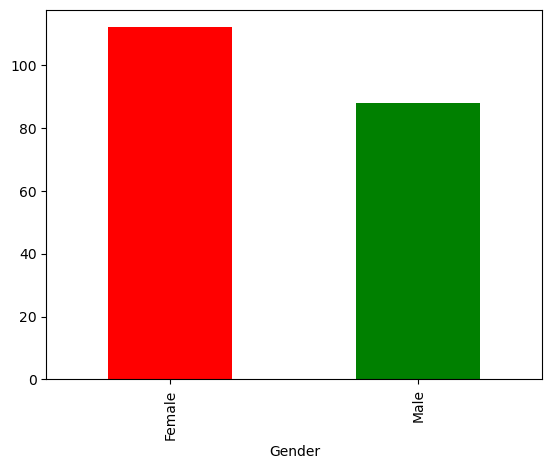

In [112]:
#แบบที่ 2 ตัวอย่างของการใช้ plot ใน pandas 
cust.groupby(['Gender'] )['Gender'].count().plot.bar(color=['r', 'g'] )

<BarContainer object of 2 artists>

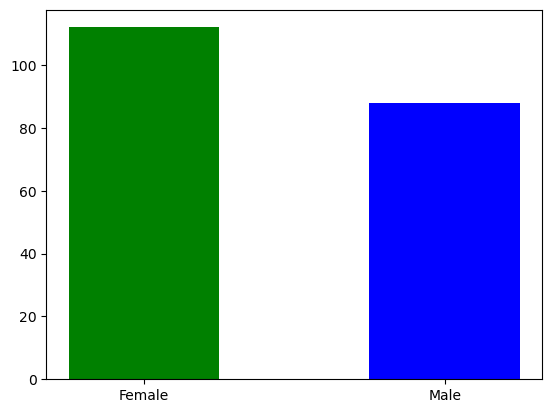

In [113]:
#แบบที่ 3 ตัวอย่างของการใช้ matplotlib
sex_count = cust.groupby(['Gender'])['Gender'].count()
plt.bar(sex_count.index, sex_count.values, width=0.5, color=('g','b'))

5. สร้าง histogram ของอายุ แบ่งเป็น 10 bin

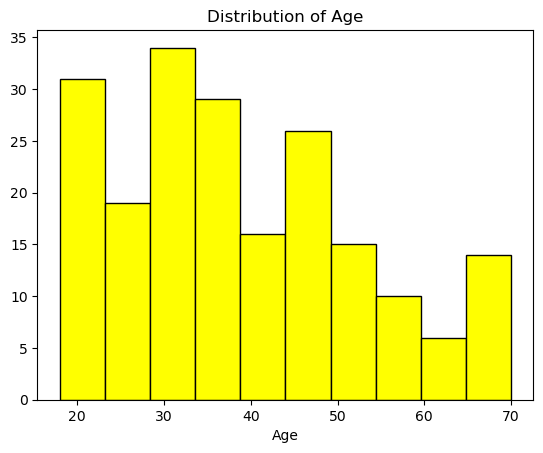

In [114]:
#แบบที่ 1 Histogram of ages โดยใช้ matplotlib


plt.hist(cust['Age'], bins=10, color = 'yellow', edgecolor = 'black')
plt.title('Distribution of Age')
plt.xlabel('Age');

<Axes: xlabel='Age', ylabel='Count'>

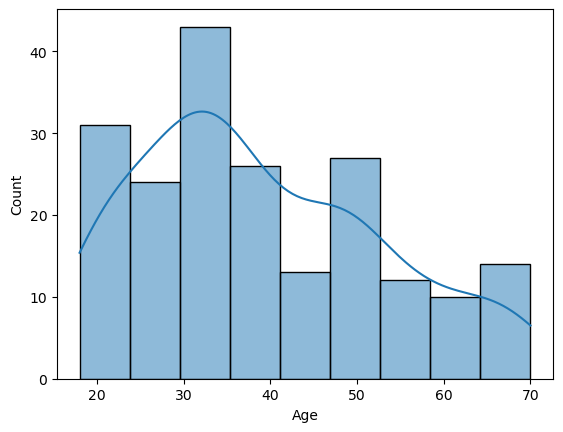

In [115]:
#แบบที่ 2 Histogram of ages โดยใช้ seaborn

#sns.distplot(cust['Age'], color = 'r', bins=10, hist_kws=dict(edgecolor="black", linewidth=2))
sns.histplot(cust['Age'],kde=True)
#sns.histplot(df["flipper_length_mm"], kde=True)

6.ทำ scatter plot ของข้อมูล Age, Income 

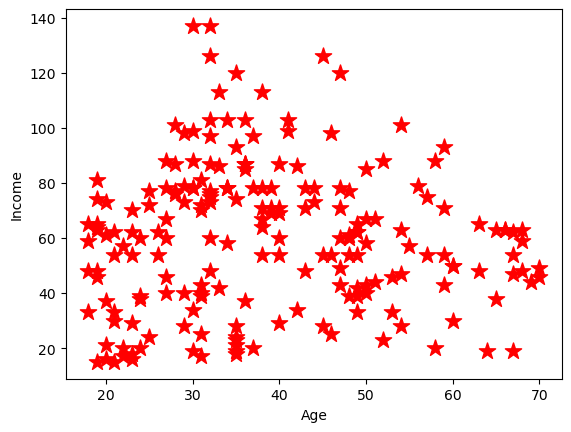

In [116]:
#ใช้ matplotlib โดยไม่แยกเพศ

plt.scatter(cust['Age'],cust['Annual Income (k$)'], marker = "*", s=150,color = 'r')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

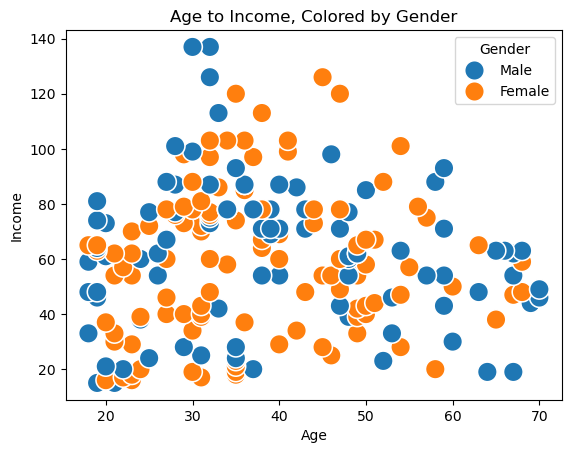

In [117]:
#แบบที่ 1 ใช้ seaborn แยกตามเพศ
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=cust, s=200); 
plt.title('Age to Income, Colored by Gender');
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

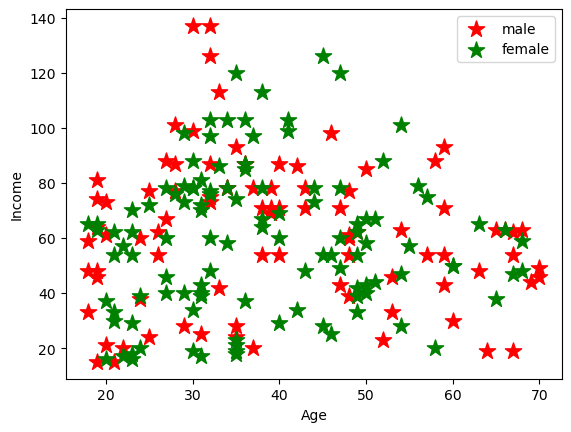

In [118]:
#แบบที่ 1 ใช้ matplotlib แยกตามเพศ

male = cust['Gender'] == "Male"
female = cust['Gender'] == "Female"

plt.scatter(cust[male]['Age'], cust[male]['Annual Income (k$)'], marker='*', c='r', s=150, label='male')
plt.scatter(cust[female]['Age'], cust[female]['Annual Income (k$)'], marker='*', c='g', s=150, label='female')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

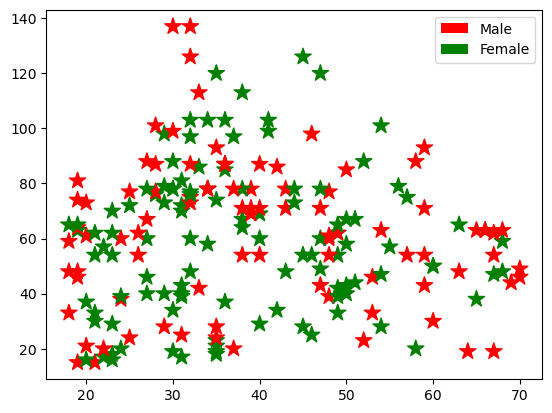

In [119]:
#แบบที่ 2 ใช้ matplotlib แยกตามเพศ

import matplotlib.patches as mpatches

colors = {'Male':'red', 'Female':'green'}

plt.scatter(cust['Age'], cust['Annual Income (k$)'], marker='*', c=cust['Gender'].map(colors), s=150)

sex_legend = [mpatches.Patch(facecolor = value, label = key) for key, value in colors.items()]
plt.legend(handles = sex_legend)



7.พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering ตามอายุและรายได้

In [120]:
X1 = cust[['Age' , 'Annual Income (k$)']].values
X1.shape

(200, 2)

In [121]:
X1

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

1 176108.77999999997
2 87179.72383252818
3 59492.737994932715
4 39542.349672654025
5 31725.82608695652
6 26928.32094197094
7 24352.17580645161
8 18896.19511162324
9 17424.220749006905


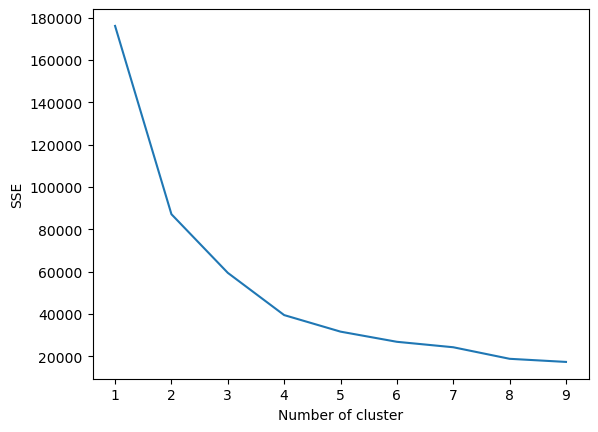

In [122]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

8. ได้ค่า k= 4 ในการจัดกลุ่มโดยวิธี K-Means

In [123]:
k_means = KMeans(n_clusters=4)
k_means.fit(X1)   # (1) สร้างกลุ่มโดยวิธี k-mean ให้กับข้อมูล
cluster_pred = k_means.predict(X1) # นำข้อมูลที่ถูกแบ่งกลุ่มแล้วจาก (1) มาใส่ว่าอยู่กลุ่มไหน
cluster_label = k_means.labels_
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [124]:
#pip install ipympl
#conda install -c conda-forge ipympl

ข้อ 9 ทำ scatter plot ที่แสดง centroid

[[31.37096774 70.        ]
 [28.82608696 29.41304348]
 [56.01785714 50.41071429]
 [37.83333333 99.88888889]]


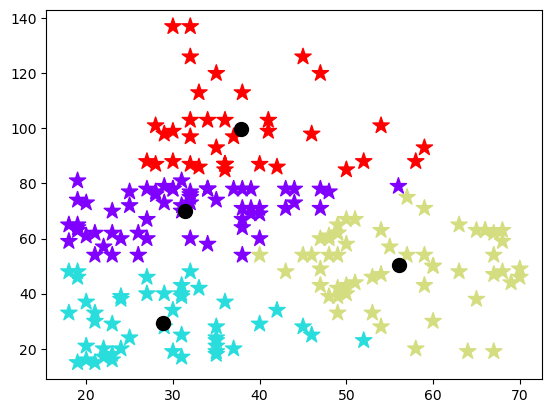

In [125]:
plt.scatter(cust['Age'], cust['Annual Income (k$)'], c=cluster_pred, cmap='rainbow', marker="*", s=150)
centers = k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)

[ตัวอย่างเพิ่มเติม] พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering ตามอายุและรายได้และคะแนนความชอบสินค้า (Spending Score)

In [126]:
X3 = cust[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']].values
X3.shape
print(X3)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

1 308812.77999999997
2 221882.39743589744
3 143342.751571706
4 105399.76632290184
5 75479.76429338777
6 75202.62071326507
7 51082.54296792137
8 47631.35815861698
9 41209.255244755244


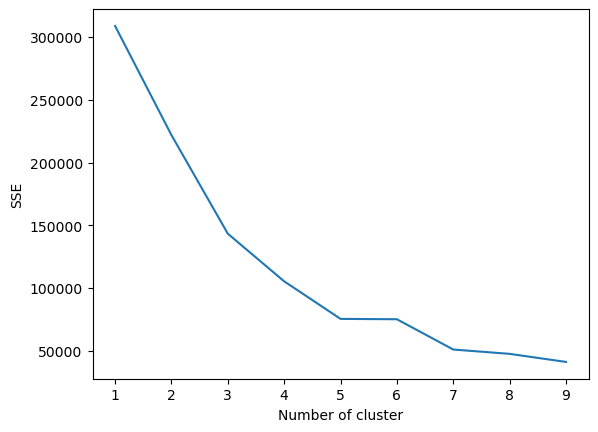

In [127]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X3)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [128]:
k_means = KMeans(n_clusters=6)
k_means.fit(X3)   # (1) สร้างกลุ่มโดยวิธี k-mean ให้กับข้อมูล
y_clusters = k_means.predict(X3) # นำข้อมูลที่ถูกแบ่งกลุ่มแล้วจาก (1) มาใส่ว่าอยู่กลุ่มไหน
cluster_label = k_means.labels_
cluster_label

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 4,
       5, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [129]:
print(X3[y_clusters == 0,2][1])

86


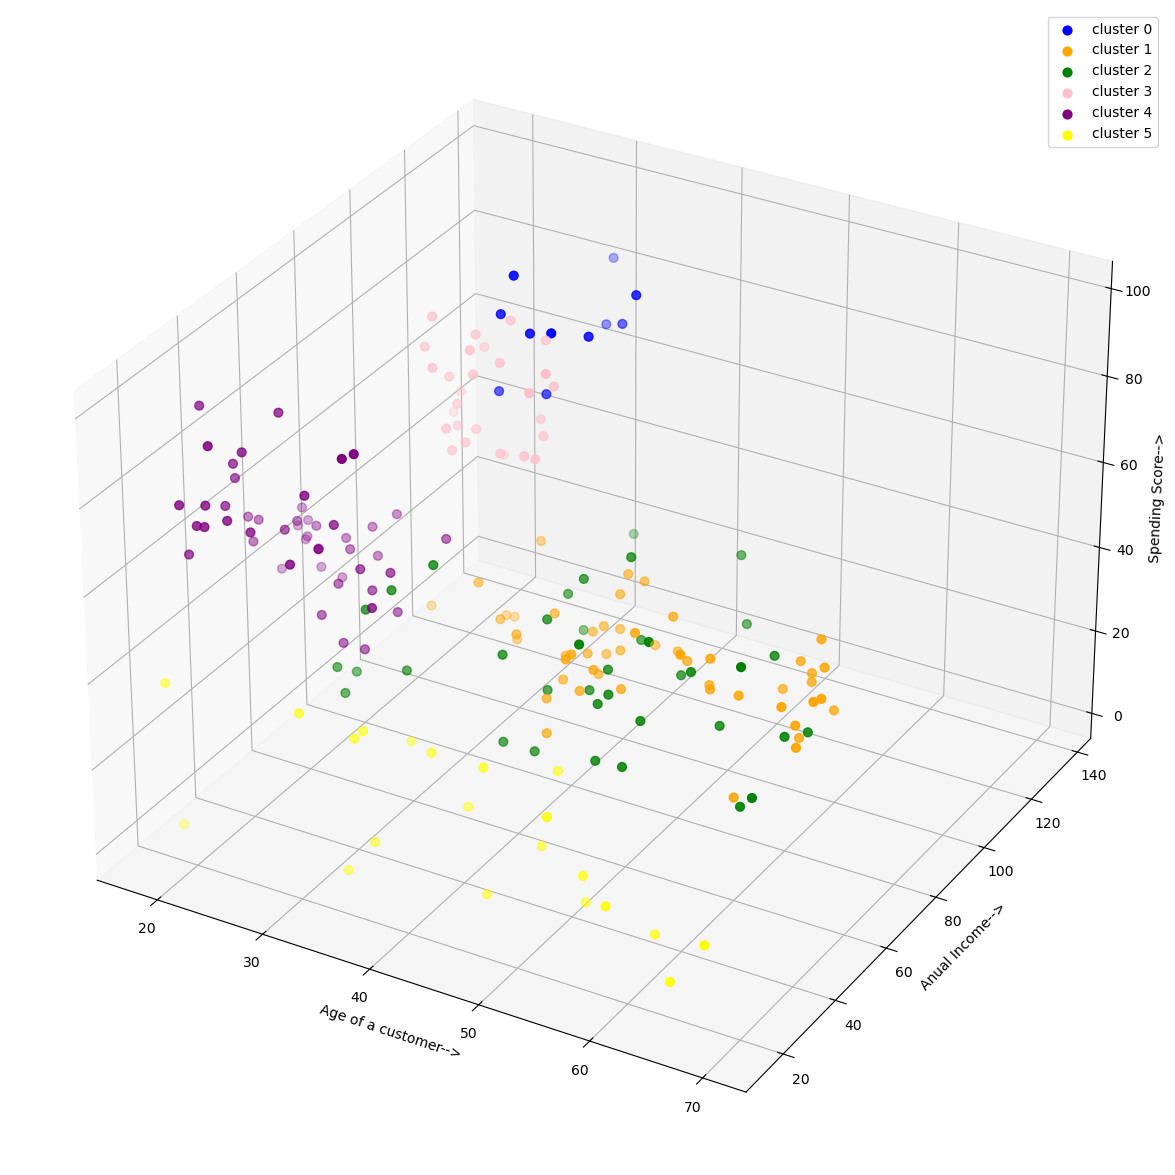

In [130]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[y_clusters == 0,0],X3[y_clusters == 0,1],X3[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X3[y_clusters == 1,0],X3[y_clusters == 1,1],X3[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X3[y_clusters == 2,0],X3[y_clusters == 2,1],X3[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X3[y_clusters == 3,0],X3[y_clusters == 3,1],X3[y_clusters == 3,2], s = 40 , color = 'pink', label = "cluster 3")
ax.scatter(X3[y_clusters == 4,0],X3[y_clusters == 4,1],X3[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(X3[y_clusters == 5,0],X3[y_clusters == 5,1],X3[y_clusters == 5,2], s = 40 , color = 'yellow', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

In [131]:
cust['cluster'] = y_clusters
print(cust['cluster'])

0      5
1      4
2      5
3      4
4      5
      ..
195    0
196    2
197    0
198    2
199    0
Name: cluster, Length: 200, dtype: int32


In [132]:
cluster0 = cust[cust.cluster==0]
cluster1 = cust[cust.cluster==1]
cluster2 = cust[cust.cluster==2]
cluster3 = cust[cust.cluster==3]
cluster4 = cust[cust.cluster==4]
cluster5 = cust[cust.cluster==5]

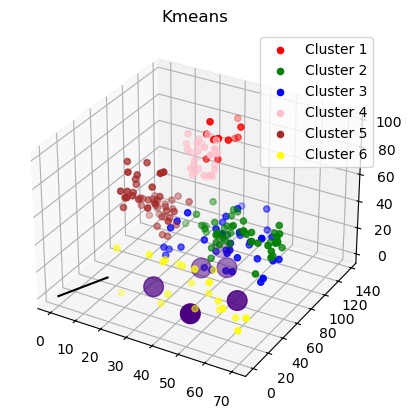

In [133]:
import numpy as np
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)

kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(cluster0['Age'], cluster0['Annual Income (k$)'], cluster0['Spending Score (1-100)'], c='red', label = 'Cluster 1')
kplot.scatter3D(cluster1['Age'], cluster1['Annual Income (k$)'], cluster1['Spending Score (1-100)'], c='green', label = 'Cluster 2')
kplot.scatter3D(cluster2['Age'], cluster2['Annual Income (k$)'], cluster2['Spending Score (1-100)'], c='blue', label = 'Cluster 3')
kplot.scatter3D(cluster3['Age'], cluster3['Annual Income (k$)'], cluster3['Spending Score (1-100)'], c='pink', label = 'Cluster 4')
kplot.scatter3D(cluster4['Age'], cluster4['Annual Income (k$)'], cluster4['Spending Score (1-100)'], c='brown', label = 'Cluster 5')
kplot.scatter3D(cluster5['Age'], cluster5['Annual Income (k$)'], cluster5['Spending Score (1-100)'], c='yellow', label = 'Cluster 6')

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()